In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns

sns.set_theme(font_scale=1.3)

np.set_printoptions(precision=6, suppress=True, edgeitems=10, linewidth=100000, 
                    formatter=dict(float=lambda x: f'{x:.2f}'))
np.random.seed(42)

In [2]:
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
raw_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
print(raw_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [4]:
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']




In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[-0.35, -1.44, -0.41, -0.39, -1.86, -1.27, -0.83, -0.95, -1.73, -0.94, ..., -0.54, -1.66, -0.59, -0.53, -1.51, -0.89, -0.75, -0.92, -0.93, -0.81],
       [-0.20, 0.31, -0.13, -0.28, 1.08, 0.86, 0.73, 0.90, 1.18, 1.47, ..., 0.04, 0.69, 0.19, -0.05, 1.13, 0.92, 1.22, 1.44, 1.15, 1.57],
       [-0.33, -0.22, -0.32, -0.36, -1.58, -0.46, -0.60, -0.76, 0.28, -0.50, ..., -0.44, -0.15, -0.32, -0.45, -1.63, -0.11, -0.54, -0.72, 0.53, -0.62],
       [1.03, 2.09, 1.05, 0.92, 0.32, 0.56, 1.05, 0.93, -0.33, -0.48, ..., 1.11, 2.17, 1.17, 1.00, 0.38, 0.86, 1.87, 1.31, 0.15, 0.42],
       [1.83, 0.70, 1.76, 1.78, -0.33, 0.63, 0.97, 1.27, -0.13, -1.71, ..., 1.47, 0.39, 1.56, 1.39, -0.58, 0.30, 0.60, 1.23, 0.05, -1.41],
       [0.33, 0.76, 0.29, 0.16, -0.36, 0.05, -0.43, -0.40, -0.27, 0.08, ..., 0.33, 0.42, 0.21, 0.18, -0.05, 0.55, 0.48, 0.15, 0.48, 0.82],
       [-0.10, -0.81, -0.14, -0.19, -0.53, -0.69, -0.98, -1.00, -1.48, -0.57, ..., -0.20, -1.33, -0.27, -0.30, -1.03, -0.94, -1.17, -1.24, -1.

In [7]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [8]:
y_pred = log_reg.predict(X_test)
y_pred[:30]

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [9]:
y_prob = log_reg.predict_proba(X_test)
y_prob[:30]

array([[0.12, 0.88],
       [1.00, 0.00],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [1.00, 0.00],
       [1.00, 0.00],
       [0.96, 0.04],
       [0.42, 0.58],
       [0.00, 1.00],
       [0.05, 0.95],
       [0.99, 0.01],
       [0.01, 0.99],
       [0.86, 0.14],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.08, 0.92],
       [0.01, 0.99],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.01, 0.99],
       [0.00, 1.00],
       [1.00, 0.00]])

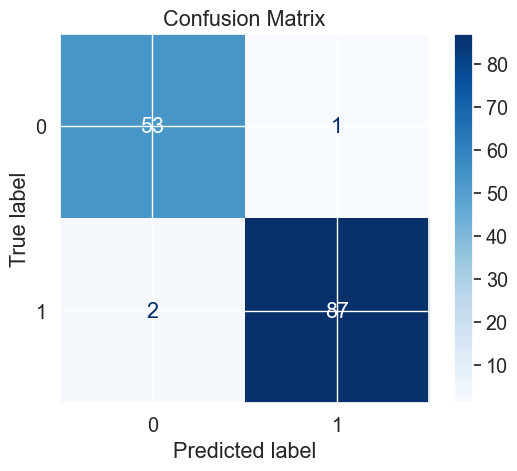

Accuracy: 0.9790209790209791


In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred,
    cmap=plt.cm.Blues  # Optional: use a different color map
)
plt.title("Confusion Matrix")
plt.show()

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

